In [74]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
sns.set(style="whitegrid")
import pingouin as pg
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [75]:
df = pd.read_csv('data.csv').drop(columns=['0.2','0.6','0.8','6.0','8.0'])
df.head()

,id,Пол,Возраст,Ситуативная_балл,Личностная_балл,Ситуативная_группа,Личностная_группа,0.4,1.0,3.0,...,ft56,ft67,ft71,ft110,At04,At45,At56,At67,At71,At110
0,1,Муж,31,24,22,1,1,"10,6","13,1","23,4",...,"0,041","0,099","0,483","0,352","0,06","0,276","0,348","0,299","0,293","0,294"
1,2,Муж,31,25,31,1,2,9,"17,9","24,2",...,"0,061","0,14","0,421","0,346","0,0562","0,18","0,195","0,196","0,201","0,2"
2,3,Муж,39,25,38,1,2,"15,9","15,4","15,6",...,"0,049","0,091","0,453","0,376","0,2647","0,35","0,203","0,439","0,338","0,33"
3,4,Жен,47,27,41,1,2,"8,8","21,3","19,5",...,"0,047","0,14","0,42","0,352","0,2158","0,235","0,31","0,251","0,284","0,291"
4,5,Муж,47,32,25,2,1,"14,9","25,8","18,4",...,"0,064","0,118","0,401","0,391","0,1438","0,16","0,246","0,257","0,253","0,255"


In [76]:
# преобразование категориальных переменных в числа
df['Пол'] = (df['Пол'] == 'Муж').astype(int)
df['Ситуативная_группа'] = df['Ситуативная_группа'].astype(int)
df['Личностная_группа'] = df['Личностная_группа'].astype(int)

# Замена запятых на точки и преобразование строковых значений в числа
df["0.4"] = df["0.4"].str.replace(",", ".").astype(float)
df["1.0"] = df["1.0"].str.replace(",", ".").astype(float)
df["3.0"] = df["3.0"].str.replace(",", ".").astype(float)
df["10.0"] = df["10.0"].str.replace(",", ".").astype(float)
df["mof"] = df["mof"].str.replace(",", ".").astype(float)
df["moA"] = df["moA"].str.replace(",", ".").astype(float)
df["ft04"] = df["ft04"].str.replace(",", ".").astype(float)
df["ft45"] = df["ft45"].str.replace(",", ".").astype(float)
df["ft56"] = df["ft56"].str.replace(",", ".").astype(float)
df["ft67"] = df["ft67"].str.replace(",", ".").astype(float)
df["ft71"] = df["ft71"].str.replace(",", ".").astype(float)
df["ft110"] = df["ft110"].str.replace(",", ".").astype(float)
df["At04"] = df["At04"].str.replace(",", ".").astype(float)
df["At45"] = df["At45"].str.replace(",", ".").astype(float)
df["At56"] = df["At56"].str.replace(",", ".").astype(float)
df["At67"] = df["At67"].str.replace(",", ".").astype(float)
df["At71"] = df["At71"].str.replace(",", ".").astype(float)
df["At110"] = df["At110"].str.replace(",", ".").astype(float)

In [77]:
df.head()

,id,Пол,Возраст,Ситуативная_балл,Личностная_балл,Ситуативная_группа,Личностная_группа,0.4,1.0,3.0,...,ft56,ft67,ft71,ft110,At04,At45,At56,At67,At71,At110
0,1,1,31,24,22,1,1,10.6,13.1,23.4,...,0.041,0.099,0.483,0.352,0.0600,0.276,0.348,0.299,0.293,0.294
1,2,1,31,25,31,1,2,9.0,17.9,24.2,...,0.061,0.140,0.421,0.346,0.0562,0.180,0.195,0.196,0.201,0.200
2,3,1,39,25,38,1,2,15.9,15.4,15.6,...,0.049,0.091,0.453,0.376,0.2647,0.350,0.203,0.439,0.338,0.330
3,4,0,47,27,41,1,2,8.8,21.3,19.5,...,0.047,0.140,0.420,0.352,0.2158,0.235,0.310,0.251,0.284,0.291
4,5,1,47,32,25,2,1,14.9,25.8,18.4,...,0.064,0.118,0.401,0.391,0.1438,0.160,0.246,0.257,0.253,0.255


## Проверка корреляций

#### Посчитаем отдельно для контрастной чувствительности (КЧ), частоты тремора и амплитуды тремора коэффициент пирсона и визуализируем результат.

<Axes: >

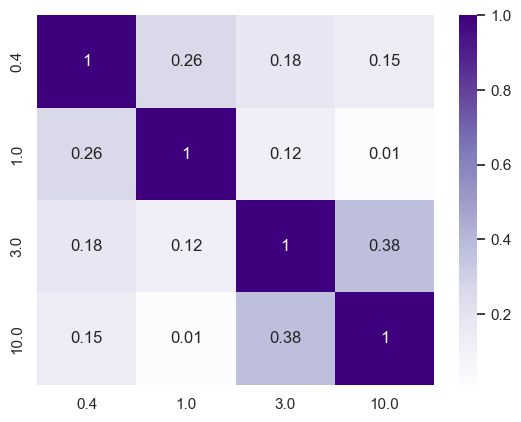

In [78]:
#КЧ
all_cols = ['0.4','1.0', '3.0', '10.0']
corr_matrix_A = df[all_cols].corr()

sns.heatmap(corr_matrix_A, annot=True, cmap='Purples')

# считаем, что корреляции допустимые для пострения модели

<Axes: >

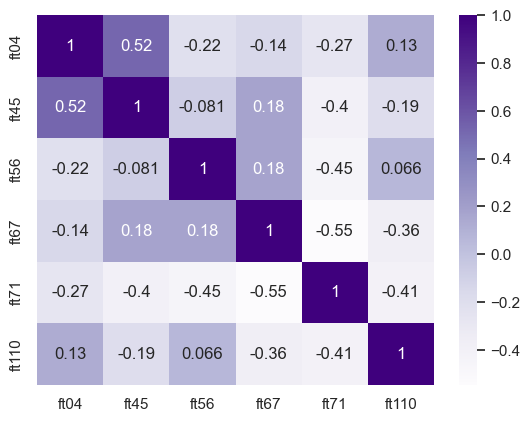

In [79]:
#частота тремора

f_cols = ['ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110']

# Посчитать коэффициенты корреляции
corr_matrix_f = df[f_cols].corr()

# Визуализировать корреляционную матрицу
sns.heatmap(corr_matrix_f, annot=True, cmap="Purples")

<Axes: >

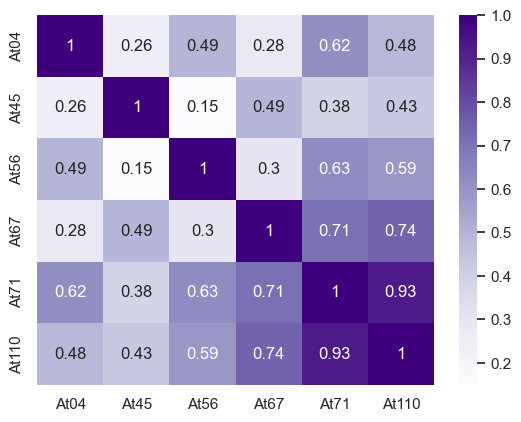

In [80]:
# амплитуда тремора

A_cols = ['At04', 'At45', 'At56', 'At67', 'At71', 'At110']

corr_matrix_A = df[A_cols].corr()

sns.heatmap(corr_matrix_A, annot=True, cmap="Purples")

# сильно коррелируют амплитуды тремора в диапазоне 60-70 (Аt67), 70-100 (Аt71) и 100-110 (Аt110)

## проверка контрастной чувствительности

In [81]:
df.columns

Index(['id', 'Пол', 'Возраст', 'Ситуативная_балл', 'Личностная_балл',
       'Ситуативная_группа', 'Личностная_группа', '0.4', '1.0', '3.0', '10.0',
       'mof', 'moA', 'ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110', 'At04',
       'At45', 'At56', 'At67', 'At71', 'At110'],
      dtype='object')

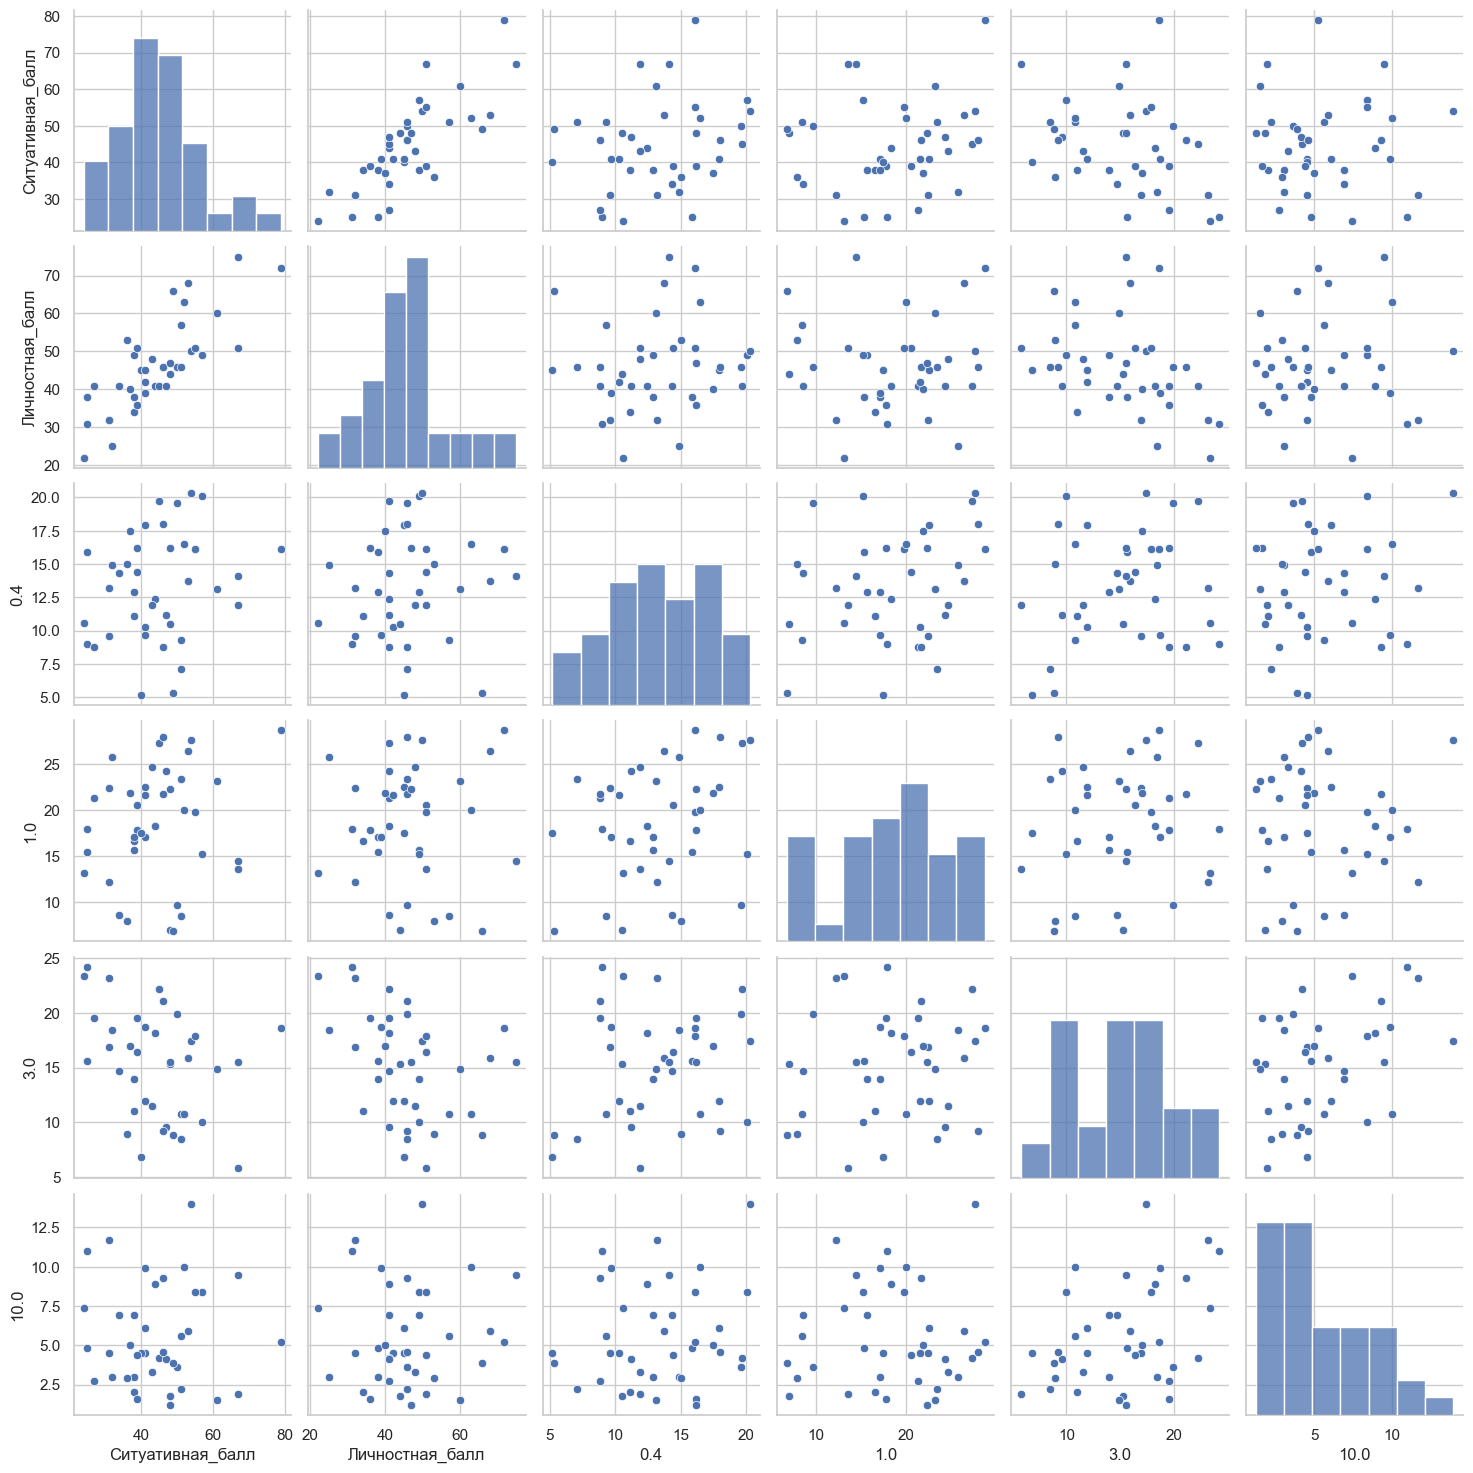

In [82]:
colns = ['Ситуативная_балл','Личностная_балл', '0.4', '1.0','3.0','10.0']
sns.pairplot(df[colns])

In [83]:
df.rename(columns = {'0.4':'cs04','1.0':'cs1', '3.0':'cs3', '10.0':'cs10',}, inplace = True )

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_to_check = df[['cs04', 'cs1','cs3', 'cs10']]
vifs = [variance_inflation_factor(df_to_check.values, i) for i in range(df_to_check.shape[1])]
pd.DataFrame(vifs, index = df_to_check.columns, columns = ['VIF'])

# считаем, что переменные в модели назависимые

,VIF
cs04,11.150946
cs1,9.242245
cs3,10.916562
cs10,4.764137


# Модель ситуативной тревоги с предикторами контрастной чувствительности


In [85]:
lm=smf.ols(formula="Ситуативная_балл ~ 1", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:03   Log-Likelihood:                -155.67
No. Observations:                  40   AIC:                             313.3
Df Residuals:                      39   BIC:                             315.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2500      1.898     23.310      0.0

,W,pval,normal
0,0.968193,0.314979,True


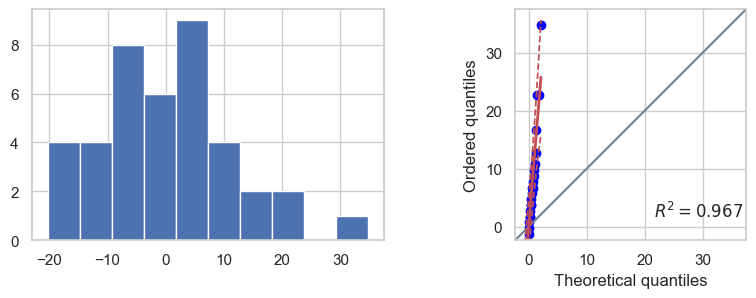

In [86]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

In [87]:
df.columns

Index(['id', 'Пол', 'Возраст', 'Ситуативная_балл', 'Личностная_балл',
       'Ситуативная_группа', 'Личностная_группа', 'cs04', 'cs1', 'cs3', 'cs10',
       'mof', 'moA', 'ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110', 'At04',
       'At45', 'At56', 'At67', 'At71', 'At110'],
      dtype='object')



# модель личностной тревоги с предикторами КЧ

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_to_check = df[['cs04', 'cs1','cs3', 'cs10']]
vifs = [variance_inflation_factor(df_to_check.values, i) for i in range(df_to_check.shape[1])]
pd.DataFrame(vifs, index = df_to_check.columns, columns = ['VIF'])

,VIF
cs04,11.150946
cs1,9.242245
cs3,10.916562
cs10,4.764137


In [89]:
lm=smf.ols(formula="Личностная_балл ~ 1", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:03   Log-Likelihood:                -154.89
No. Observations:                  40   AIC:                             311.8
Df Residuals:                      39   BIC:                             313.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0500      1.862     24.733      0.0

,W,pval,normal
0,0.962001,0.195975,True


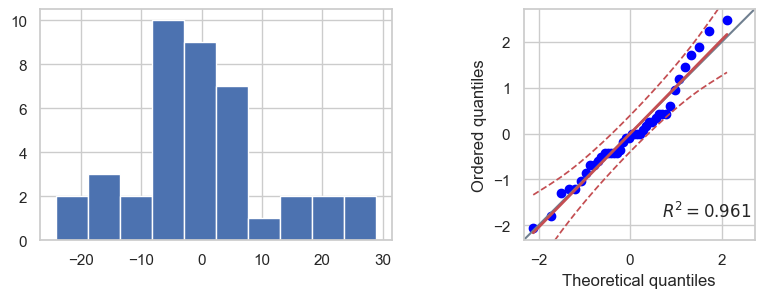

In [90]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

In [91]:
lm=smf.ols(formula="Личностная_балл ~ standardize(cs04)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3580
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.553
Time:                        14:11:04   Log-Likelihood:                -154.70
No. Observations:                  40   AIC:                             313.4
Df Residuals:                      38   BIC:                             316.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.87

In [92]:
lm=smf.ols(formula="Личностная_балл ~ standardize(cs04)+standardize(cs1)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.1743
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.841
Time:                        14:11:04   Log-Likelihood:                -154.70
No. Observations:                  40   AIC:                             315.4
Df Residuals:                      37   BIC:                             320.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.90

In [93]:
lm=smf.ols(formula="Личностная_балл ~ standardize(cs04)+standardize(cs1)+ standardize(cs3)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2.321
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0916
Time:                        14:11:04   Log-Likelihood:                -151.36
No. Observations:                  40   AIC:                             310.7
Df Residuals:                      36   BIC:                             317.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.77

In [94]:
lm=smf.ols(formula="Личностная_балл ~ standardize(cs04)+standardize(cs1)+ standardize(cs3)+ standardize(cs10) ", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.135
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0971
Time:                        14:11:04   Log-Likelihood:                -150.53
No. Observations:                  40   AIC:                             311.1
Df Residuals:                      35   BIC:                             319.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.76

## Выводы:
1. Log-Likelihood снижается с каждым новым добавлением предиктора
2. Значимость есть только на частоте 3.0 (р<0.05)
# Строим модель ситуативной тревоги с предикторами КЧ

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_to_check = df[['cs04', 'cs1','cs3', 'cs10']]
vifs = [variance_inflation_factor(df_to_check.values, i) for i in range(df_to_check.shape[1])]
pd.DataFrame(vifs, index = df_to_check.columns, columns = ['VIF'])

,VIF
cs04,11.150946
cs1,9.242245
cs3,10.916562
cs10,4.764137


In [96]:
lm=smf.ols(formula="Ситуативная_балл ~ 1", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:04   Log-Likelihood:                -155.67
No. Observations:                  40   AIC:                             313.3
Df Residuals:                      39   BIC:                             315.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2500      1.898     23.310      0.0

,W,pval,normal
0,0.968193,0.314979,True


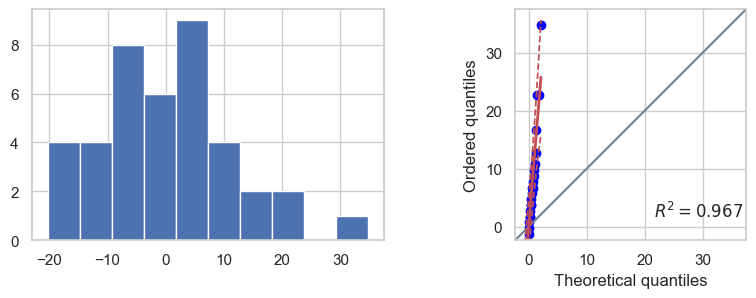

In [97]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

# точки сильно отклоняются от прямой (что делать?)

In [98]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(cs04)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.927
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.173
Time:                        14:11:04   Log-Likelihood:                -154.68
No. Observations:                  40   AIC:                             313.4
Df Residuals:                      38   BIC:                             316.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.87

In [99]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(cs04)+standardize(cs1)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.224
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.306
Time:                        14:11:04   Log-Likelihood:                -154.39
No. Observations:                  40   AIC:                             314.8
Df Residuals:                      37   BIC:                             319.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.88

In [100]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(cs04)+standardize(cs1)+ standardize(cs3)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     3.003
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0431
Time:                        14:11:04   Log-Likelihood:                -151.20
No. Observations:                  40   AIC:                             310.4
Df Residuals:                      36   BIC:                             317.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.76

In [101]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(cs04)+standardize(cs1)+ standardize(cs3)+ standardize(cs10) ", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     2.346
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0736
Time:                        14:11:04   Log-Likelihood:                -150.92
No. Observations:                  40   AIC:                             311.8
Df Residuals:                      35   BIC:                             320.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.77

## Выводы:
1. Log-Likelihood с каждым новым предиктором снижается,  
2. Значимость обнаружена только на частоте 3.0
### Пробуем перевернуть таблицу и строим новые модели 

In [102]:
df_melted = pd.melt(df, id_vars =['id','Ситуативная_балл','Личностная_балл'], value_vars =['cs04','cs1','cs3','cs10'])

In [103]:
df_melted

,id,Ситуативная_балл,Личностная_балл,variable,value
0,1,24,22,cs04,10.6
1,2,25,31,cs04,9.0
2,3,25,38,cs04,15.9
3,4,27,41,cs04,8.8
4,5,32,25,cs04,14.9
...,...,...,...,...,...
155,36,52,63,cs10,10.0
156,37,49,66,cs10,3.9
157,38,53,68,cs10,5.9
158,39,79,72,cs10,5.2


In [104]:
lm=smf.ols(formula="value ~ 1", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:04   Log-Likelihood:                -529.87
No. Observations:                 160   AIC:                             1062.
Df Residuals:                     159   BIC:                             1065.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1187      0.526     24.922      0.0

,W,pval,normal
0,0.980109,0.02093,False


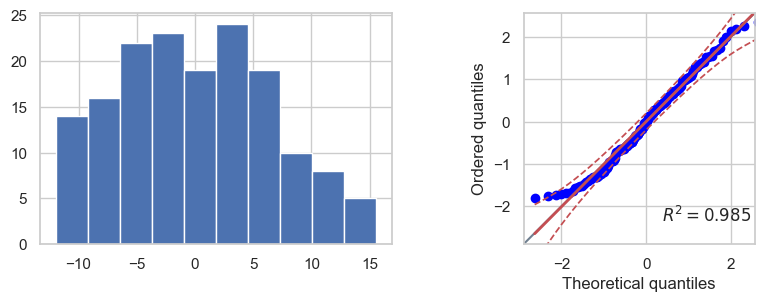

In [105]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

In [106]:
lm=smf.ols(formula="value ~ variable", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     56.63
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           8.06e-25
Time:                        14:11:05   Log-Likelihood:                -470.93
No. Observations:                 160   AIC:                             949.9
Df Residuals:                     156   BIC:                             962.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.2825      0.735  

In [107]:
lm=smf.ols(formula="value ~ Ситуативная_балл", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.03272
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.857
Time:                        14:11:05   Log-Likelihood:                -529.85
No. Observations:                 160   AIC:                             1064.
Df Residuals:                     158   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.7623      2.040  

In [108]:
lm=smf.ols(formula="value ~ Личностная_балл", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2582
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.612
Time:                        14:11:05   Log-Likelihood:                -529.74
No. Observations:                 160   AIC:                             1063.
Df Residuals:                     158   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.1805      2.155     

## Вывод:
нет зависимости значения КЧ на всех дипазонах с баллом ситуативной и личностной тревоги. 

## Проверка частоты тремора

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_to_check = df[['ft04', 'ft45',
       'ft56', 'ft67', 'ft71', 'ft110']]
vifs = [variance_inflation_factor(df_to_check.values, i) for i in range(df_to_check.shape[1])]
pd.DataFrame(vifs, index = df_to_check.columns, columns = ['VIF'])

# предикторы зависимы. Варианты действий:
# 1. Игнорируем проблему мультиколлинеарности и строим регрессионную модель
# 2. Смотрим на частные корреляции, при этом делим р - значение на количество гипотез

,VIF
ft04,6.613171
ft45,23.218149
ft56,73.529889
ft67,77.997906
ft71,235.860272
ft110,374.002840


## 1. Bариант.  Строим модель ситуативной тревоги с предикторами частоты тремора

In [110]:
lm=smf.ols(formula="Ситуативная_балл ~ 1", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:05   Log-Likelihood:                -155.67
No. Observations:                  40   AIC:                             313.3
Df Residuals:                      39   BIC:                             315.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2500      1.898     23.310      0.0

,W,pval,normal
0,0.968193,0.314979,True


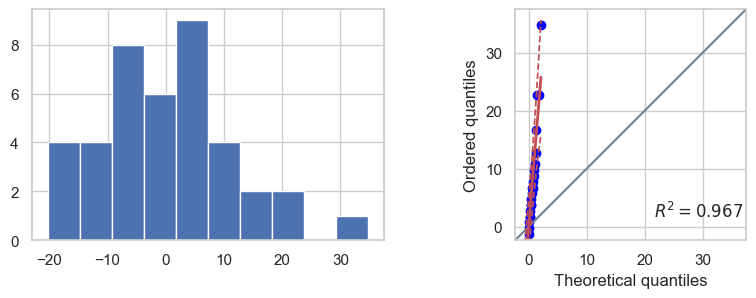

In [111]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

In [112]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(ft04)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.5937
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.446
Time:                        14:11:05   Log-Likelihood:                -155.36
No. Observations:                  40   AIC:                             314.7
Df Residuals:                      38   BIC:                             318.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.90

In [113]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(ft04)+standardize(ft45)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2898
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.750
Time:                        14:11:05   Log-Likelihood:                -155.36
No. Observations:                  40   AIC:                             316.7
Df Residuals:                      37   BIC:                             321.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.93

In [114]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.2667
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.849
Time:                        14:11:05   Log-Likelihood:                -155.23
No. Observations:                  40   AIC:                             318.5
Df Residuals:                      36   BIC:                             325.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.95

In [115]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)+ standardize(ft67)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.070
Method:                 Least Squares   F-statistic:                    0.3642
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.832
Time:                        14:11:05   Log-Likelihood:                -154.85
No. Observations:                  40   AIC:                             319.7
Df Residuals:                      35   BIC:                             328.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.96

In [116]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)+ standardize(ft67)+ standardize(ft71)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.085
Method:                 Least Squares   F-statistic:                    0.3910
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.852
Time:                        14:11:05   Log-Likelihood:                -154.55
No. Observations:                  40   AIC:                             321.1
Df Residuals:                      34   BIC:                             331.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.97

In [117]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)+ standardize(ft67)+ standardize(ft71)+ standardize(ft110)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                    0.3490
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.905
Time:                        14:11:05   Log-Likelihood:                -154.44
No. Observations:                  40   AIC:                             322.9
Df Residuals:                      33   BIC:                             334.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             44.2500      2

## Вывод:
1. значимых предикторов частоты тремора для ситуативной тревоги не обнаружено



## Строим модель личностной тревоги с предикторами частоты тремора

In [118]:
lm=smf.ols(formula="Личностная_балл ~ 1", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:05   Log-Likelihood:                -154.89
No. Observations:                  40   AIC:                             311.8
Df Residuals:                      39   BIC:                             313.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0500      1.862     24.733      0.0

,W,pval,normal
0,0.962001,0.195975,True


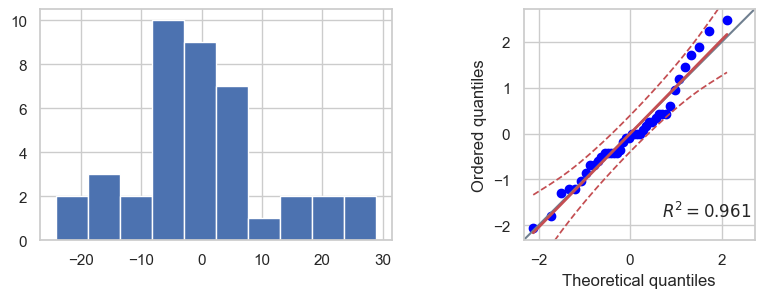

In [119]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

In [120]:
lm=smf.ols(formula="Личностная_балл ~ standardize(ft04)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                  0.006852
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.934
Time:                        14:11:06   Log-Likelihood:                -154.89
No. Observations:                  40   AIC:                             313.8
Df Residuals:                      38   BIC:                             317.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.88

In [121]:
lm=smf.ols(formula="Личностная_балл ~ standardize(ft04)+standardize(ft45)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                   0.01280
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.987
Time:                        14:11:06   Log-Likelihood:                -154.88
No. Observations:                  40   AIC:                             315.8
Df Residuals:                      37   BIC:                             320.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.91

In [122]:
lm=smf.ols(formula="Личностная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                   0.01391
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.998
Time:                        14:11:06   Log-Likelihood:                -154.87
No. Observations:                  40   AIC:                             317.7
Df Residuals:                      36   BIC:                             324.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.93

In [123]:
lm=smf.ols(formula="Личностная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)+ standardize(ft67)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.109
Method:                 Least Squares   F-statistic:                   0.04137
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.997
Time:                        14:11:06   Log-Likelihood:                -154.80
No. Observations:                  40   AIC:                             319.6
Df Residuals:                      35   BIC:                             328.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.96

In [124]:
lm=smf.ols(formula="Личностная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)+ standardize(ft67)+ standardize(ft71)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.140
Method:                 Least Squares   F-statistic:                   0.03962
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.999
Time:                        14:11:06   Log-Likelihood:                -154.78
No. Observations:                  40   AIC:                             321.6
Df Residuals:                      34   BIC:                             331.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.98

In [125]:
lm=smf.ols(formula="Личностная_балл ~ standardize(ft04)+standardize(ft45)+ standardize(ft56)+ standardize(ft67)+ standardize(ft71)+ standardize(ft110)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.166
Method:                 Least Squares   F-statistic:                   0.07664
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.998
Time:                        14:11:06   Log-Likelihood:                -154.62
No. Observations:                  40   AIC:                             323.2
Df Residuals:                      33   BIC:                             335.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             46.0500      2

## Вывод:
1. значимых предикторов частоты тремора для личнсотной тревоги не обнаружено

## строим модель частоты тремора с предикторами личностной и ситуативной тревоги (через melt)

In [126]:
df_melted = pd.melt(df, id_vars =['id','Ситуативная_балл','Личностная_балл'], value_vars =['ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110'])
lm=smf.ols(formula="value ~ Личностная_балл", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                 8.957e-07
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.999
Time:                        14:11:06   Log-Likelihood:                 85.620
No. Observations:                 240   AIC:                            -167.2
Df Residuals:                     238   BIC:                            -160.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1666      0.045     

In [127]:
lm=smf.ols(formula="value ~ Ситуативная_балл", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                 1.433e-07
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               1.00
Time:                        14:11:06   Log-Likelihood:                 85.620
No. Observations:                 240   AIC:                            -167.2
Df Residuals:                     238   BIC:                            -160.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1667      0.042  

## Вывод:
1. нет связи между частотой тремора и баллом тревожности

## Строим модель ситуативной тревоги с предикторами амплитуды тремора¶

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_to_check = df[['At04', 'At45', 'At56', 'At67', 'At71',
       'At110']]
vifs = [variance_inflation_factor(df_to_check.values, i) for i in range(df_to_check.shape[1])]
pd.DataFrame(vifs, index = df_to_check.columns, columns = ['VIF'])

# предикторы зависимы. Варианты действий:
# 1. Игнорируем проблему мультиколлинеарности и строим регрессионную модель
# 2. Смотрим на частные корреляции, при этом делим р - значение на количество гипотез (?или какой еще вариант анализа данных тут возможен?)

,VIF
At04,3.646077
At45,21.264732
At56,32.208082
At67,83.690942
At71,281.561096
At110,288.678664


In [129]:
lm=smf.ols(formula="Ситуативная_балл ~ 1", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:06   Log-Likelihood:                -155.67
No. Observations:                  40   AIC:                             313.3
Df Residuals:                      39   BIC:                             315.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2500      1.898     23.310      0.0

,W,pval,normal
0,0.968193,0.314979,True


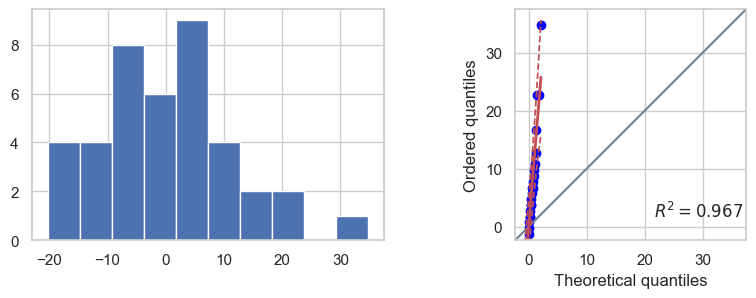

In [130]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

In [131]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(At04)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.091
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.156
Time:                        14:11:06   Log-Likelihood:                -154.60
No. Observations:                  40   AIC:                             313.2
Df Residuals:                      38   BIC:                             316.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.87

In [132]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(At04)+standardize(At45)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.913
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.162
Time:                        14:11:06   Log-Likelihood:                -153.70
No. Observations:                  40   AIC:                             313.4
Df Residuals:                      37   BIC:                             318.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.85

In [133]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.246
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.307
Time:                        14:11:06   Log-Likelihood:                -153.69
No. Observations:                  40   AIC:                             315.4
Df Residuals:                      36   BIC:                             322.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.88

In [134]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)+ standardize(At67)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9805
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.431
Time:                        14:11:06   Log-Likelihood:                -153.54
No. Observations:                  40   AIC:                             317.1
Df Residuals:                      35   BIC:                             325.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.90

In [135]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)+ standardize(At67)+ standardize(At71) ", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.162
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.348
Time:                        14:11:07   Log-Likelihood:                -152.51
No. Observations:                  40   AIC:                             317.0
Df Residuals:                      34   BIC:                             327.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            44.2500      1.87

In [136]:
lm=smf.ols(formula="Ситуативная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)+ standardize(At67)+ standardize(At71)+ standardize(At110)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Ситуативная_балл   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.237
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.313
Time:                        14:11:07   Log-Likelihood:                -151.61
No. Observations:                  40   AIC:                             317.2
Df Residuals:                      33   BIC:                             329.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             44.2500      1

## Вывод:
1. значимых предикторов амплитуды тремора для ситуативной тревоги не обнаружено. 
## Cтроим модель личностной тревоги с предикторами амплитуды тремора

In [137]:
lm=smf.ols(formula="Личностная_балл ~  1", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        14:11:07   Log-Likelihood:                -154.89
No. Observations:                  40   AIC:                             311.8
Df Residuals:                      39   BIC:                             313.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0500      1.862     24.733      0.0

,W,pval,normal
0,0.962001,0.195975,True


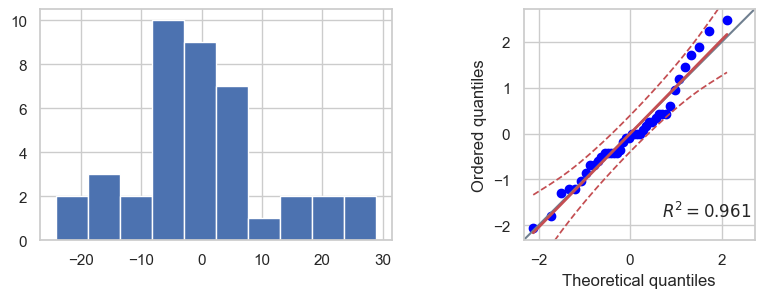

In [138]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist(lm.resid)
pg.qqplot(lm.resid, ax=axs[1]);
pg.normality(lm.resid)

In [139]:
lm=smf.ols(formula="Личностная_балл ~ standardize(At04)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.665
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.205
Time:                        14:11:07   Log-Likelihood:                -154.03
No. Observations:                  40   AIC:                             312.1
Df Residuals:                      38   BIC:                             315.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.84

In [140]:
lm=smf.ols(formula="Личностная_балл ~ standardize(At04)+standardize(At45)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.843
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.173
Time:                        14:11:07   Log-Likelihood:                -152.99
No. Observations:                  40   AIC:                             312.0
Df Residuals:                      37   BIC:                             317.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.82

In [141]:
lm=smf.ols(formula="Личностная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.484
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.235
Time:                        14:11:07   Log-Likelihood:                -152.56
No. Observations:                  40   AIC:                             313.1
Df Residuals:                      36   BIC:                             319.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.82

In [142]:
lm=smf.ols(formula="Личностная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)+ standardize(At67) ", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.663
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.181
Time:                        14:11:07   Log-Likelihood:                -151.41
No. Observations:                  40   AIC:                             312.8
Df Residuals:                      35   BIC:                             321.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.80

In [143]:
lm=smf.ols(formula="Личностная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)+ standardize(At67)+ standardize(At71)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.303
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.286
Time:                        14:11:07   Log-Likelihood:                -151.39
No. Observations:                  40   AIC:                             314.8
Df Residuals:                      34   BIC:                             324.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.0500      1.82

In [144]:
lm=smf.ols(formula="Личностная_балл ~ standardize(At04)+standardize(At45)+ standardize(At56)+ standardize(At67)+ standardize(At71)+ standardize(At110)", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Личностная_балл   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.063
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.404
Time:                        14:11:07   Log-Likelihood:                -151.36
No. Observations:                  40   AIC:                             316.7
Df Residuals:                      33   BIC:                             328.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             46.0500      1

## Вывод:
    1. значимых предикторов амплитуды тремора для личностной тревоги не обнаружено
    
## Пробую смэлтить таблицу, чтобы построить модель амплитуды тремора с предиктором тревоги

In [145]:
df_melted = pd.melt(df, id_vars =['id','Ситуативная_балл','Личностная_балл'], value_vars =['At04',
       'At45', 'At56', 'At67', 'At71', 'At110'])
lm=smf.ols(formula="value ~ Личностная_балл", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.641
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.105
Time:                        14:11:07   Log-Likelihood:                 243.06
No. Observations:                 240   AIC:                            -482.1
Df Residuals:                     238   BIC:                            -475.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2776      0.023     

In [146]:
lm=smf.ols(formula="value ~ Ситуативная_балл", data=df_melted).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6355
Date:                Fri, 28 Apr 2023   Prob (F-statistic):              0.426
Time:                        14:11:07   Log-Likelihood:                 242.05
No. Observations:                 240   AIC:                            -480.1
Df Residuals:                     238   BIC:                            -473.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2580      0.022  

## Вывод:
нет взаимосвязи между значением амплитуды тремора с баллом тревоги 